<a href="https://colab.research.google.com/github/jwala1107/mycollege_demo/blob/main/MinMax_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/wine-clustering.csv',header=None,usecols=[0,1,2])
df.columns=['class label','Alcohal','Malic_Acid']

In [4]:
df

,class label,Alcohal,Malic_Acid
0,Alcohol,Malic_Acid,Ash
1,14.23,1.71,2.43
2,13.2,1.78,2.14
3,13.16,2.36,2.67
4,14.37,1.95,2.5
...,...,...,...
174,13.71,5.65,2.45
175,13.4,3.91,2.48
176,13.27,4.28,2.26
177,13.17,2.59,2.37


<Axes: xlabel='Alcohal', ylabel='Malic_Acid'>

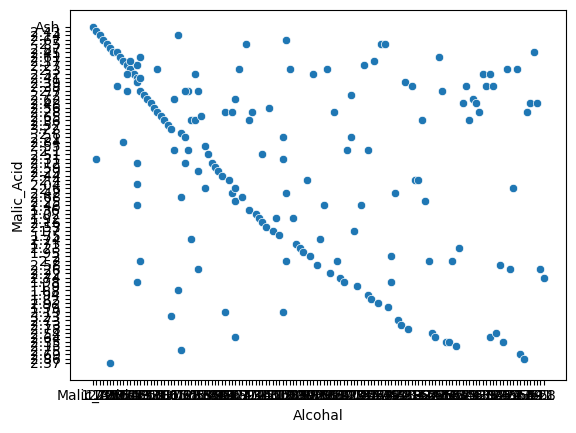

In [6]:
sns.scatterplot(data=df, x='Alcohal', y='Malic_Acid')

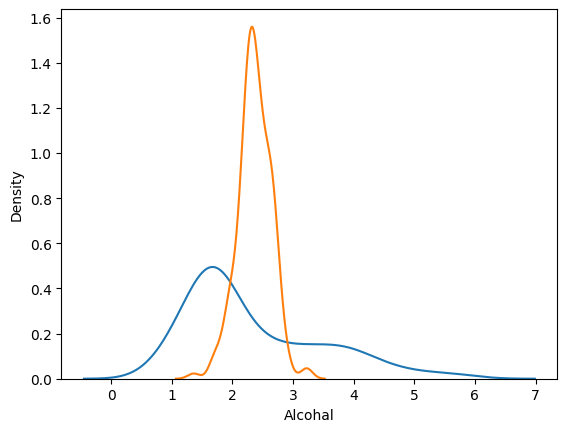

In [9]:
# Convert 'Alcohal' and 'Malic_Acid' columns to numeric type
df['Alcohal'] = pd.to_numeric(df['Alcohal'], errors='coerce')
df['Malic_Acid'] = pd.to_numeric(df['Malic_Acid'], errors='coerce')

sns.kdeplot(df['Alcohal'])
sns.kdeplot(df['Malic_Acid'])
plt.show() # Add this line to display the plot

In [15]:
color_dict={1:'red',3:'green',2:'blue'}
# Pass data as a DataFrame and specify x and y as column names
sns.scatterplot(data=df, x='Alcohal', y='Malic_Acid', hue='class label', palette=color_dict)

ValueError: The palette dictionary is missing keys: {'12.29', '11.64', '11.45', '13.3', '13.77', '12.93', '13.9', '13.48', '11.62', '11.87', '12.88', '13.23', '12.25', '13.76', '12.17', '12.52', '13.17', '14.02', '13.87', '13.88', '12.51', '13.4', '11.03', '11.81', '12.37', '14.34', '12.99', '12.87', '13.63', '13.39', 'Alcohol', '14.13', '11.84', '12.08', '12.34', '11.76', '13.11', '12.82', '13.24', '14.1', '14.3', '11.65', '13.28', '11.79', '13.08', '11.96', '13.41', '14.37', '11.46', '13.05', '12.67', '13.36', '13.68', '13.71', '13.64', '14.22', '12.86', '12.77', '14.23', '12.84', '14.75', '14.12', '13.75', '13.56', '13.16', '11.82', '12.58', '12.33', '13.67', '13.34', '13.84', '12.47', '13.51', '13.62', '12.7', '12.53', '14.21', '13.69', '13.45', '12.64', '13.58', '13.72', '12.42', '13.07', '13.27', '13.5', '12.16', '13.73', '12.45', '11.61', '12.72', '12.69', '14.06', '12.43', '12', '13.86', '12.6', '13.74', '13.32', '13.2', '12.85', '12.2', '12.04', '14.38', '11.56', '14.39', '13.03', '14.16', '12.22', '13.83', '13.78', '14.2', '14.19', '13.94', '13.49', '13.29', '13.52', '12.79', '11.41', '11.66', '12.36', '12.81', '12.21', '12.96', '12.07', '14.83', '13.82'}

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('class label',axis=1),
                                                df['class label'],
                                                test_size=0.3,
                                                random_state=0)
x_train.shape,x_test.shape




((125, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(x_train)
x_train_scaled=Scaler.transform(x_train)
x_test_scaled=Scaler.transform(x_test)

In [21]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
np.round(x_train.describe(),1)

,Alcohal,Malic_Acid
count,124.0,124.0
mean,2.3,2.4
std,1.1,0.3
min,0.7,1.7
25%,1.5,2.2
50%,1.8,2.4
75%,3.0,2.6
max,5.6,2.9


In [22]:
np.round(x_train_scaled.describe(),1)

,Alcohal,Malic_Acid
count,124.0,124.0
mean,0.3,0.6
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.5
50%,0.2,0.6
75%,0.5,0.8
max,1.0,1.0


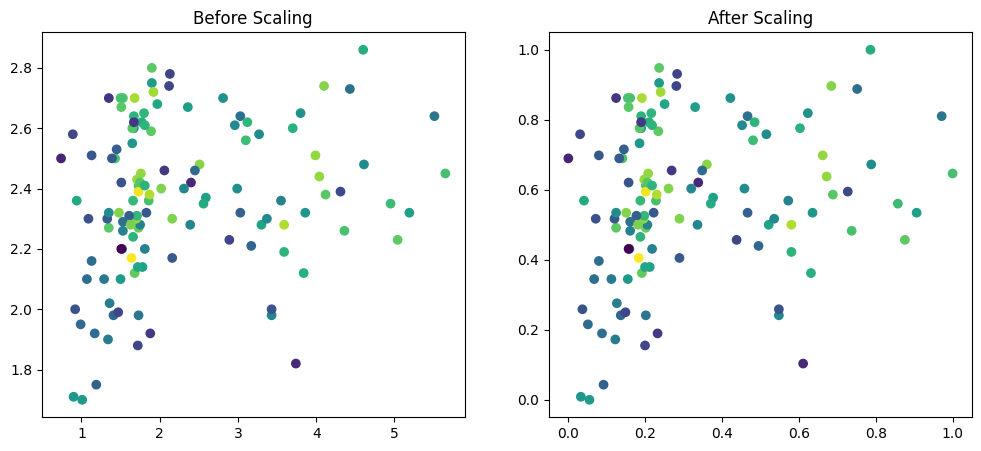

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before scaling
ax1.scatter(x_train['Alcohal'], x_train['Malic_Acid'], c=y_train)
ax1.set_title('Before Scaling')

# Scatter plot after scaling
ax2.scatter(x_train_scaled['Alcohal'], x_train_scaled['Malic_Acid'], c=y_train)
ax2.set_title('After Scaling')  # Corrected method name

plt.show()

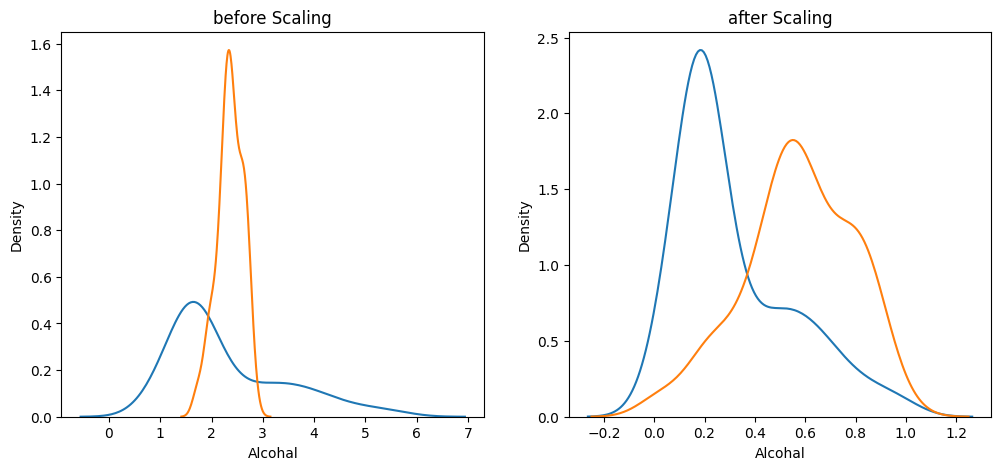

In [30]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('before Scaling')
sns.kdeplot(x_train['Alcohal'],ax=ax1)
sns.kdeplot(x_train['Malic_Acid'],ax=ax1)
#after scaling
ax2.set_title('after Scaling')
sns.kdeplot(x_train_scaled['Alcohal'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic_Acid'],ax=ax2)
plt.show()



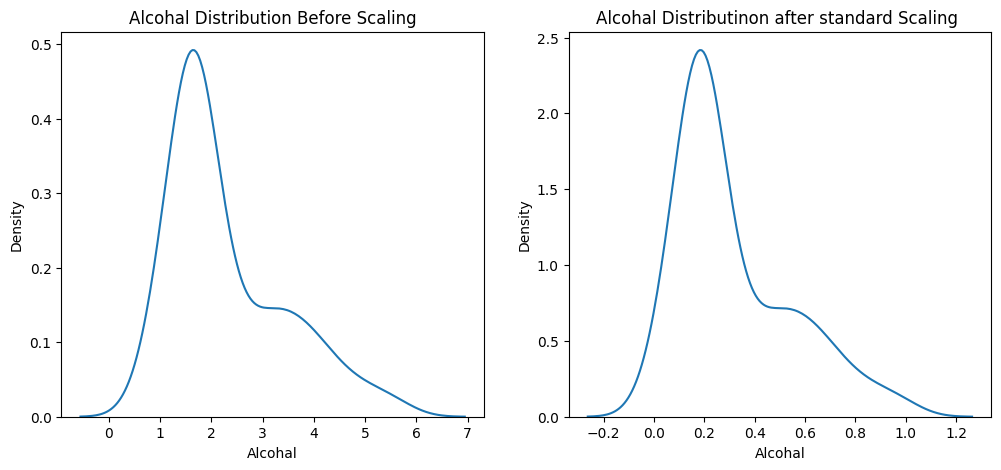

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Alcohal Distribution Before Scaling')
sns.kdeplot(x_train['Alcohal'],ax=ax1)
#after scaling
ax2.set_title('Alcohal Distributinon after standard Scaling ')
sns.kdeplot(x_train_scaled['Alcohal'],ax=ax2)
plt.show()


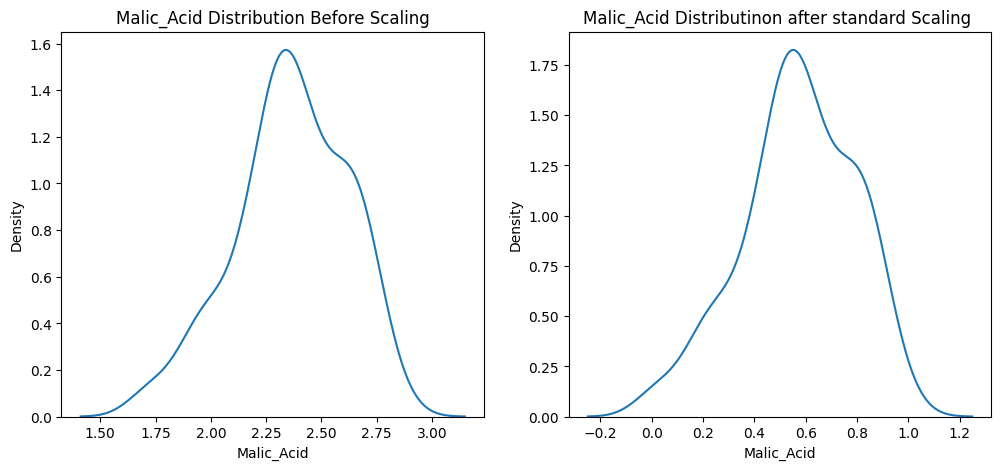

In [32]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Malic_Acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic_Acid'],ax=ax1)
#after scaling
ax2.set_title('Malic_Acid Distributinon after standard Scaling ')
sns.kdeplot(x_train_scaled['Malic_Acid'],ax=ax2)
plt.show()
